In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!mkdir -p /content/drive/MyDrive/FinSentinal/data
!mkdir -p /content/drive/MyDrive/FinSentinal/code
!mkdir -p /content/drive/MyDrive/FinSentinal/docs

In [ ]:
!pip install yfinance vaderSentiment pandas numpy scikit-learn xgboost lightgbm shap lime matplotlib seaborn plotly streamlit python-dotenv imbalanced-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 8.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 93.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 114.5 MB/s eta 0:00:00
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=a9d54579f0604a64721114b1b029139376f9db70e75b137a8697afdc150f7ffe
  Stored in directory: /root/.cache/pip/wheels/e7/5d/0e/4b4fff9a47468fed5633211fb3b76d1db43fe806a17fb7486a
Successfully built lime


In [ ]:
import nltk
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
from google.colab import files
files.upload()  # Upload kaggle.json

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"vishnupejathaya","key":"e64f5b556c137913d1e57d92ce2146dd"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d fedesoriano/company-bankruptcy-prediction -p /content/drive/MyDrive/FinSentinal/data --unzip

Dataset URL: https://www.kaggle.com/datasets/fedesoriano/company-bankruptcy-prediction
License(s): copyright-authors
  0% 0.00/4.63M [00:00<?, ?B/s]
100% 4.63M/4.63M [00:00<00:00, 131MB/s]


In [ ]:
import pandas as pd
df_bankrupt = pd.read_csv('/content/drive/MyDrive/FinSentinal/data/data.csv')  # File is named data.csv
print("Shape:", df_bankrupt.shape)  # (6819, 96)
print("Bankrupt cases:", df_bankrupt['Bankrupt?'].sum())  # ~220
df_bankrupt.head()

Shape: (6819, 96)
Bankrupt cases: 220


,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [ ]:
import pandas as pd
import numpy as np

# Load bankruptcy data
df_bankrupt = pd.read_csv('/content/drive/MyDrive/FinSentinal/data/data.csv')

# === FIXED: Add tickers and years correctly ===
np.random.seed(42)
tickers = ['AAPL', 'TSLA', 'MSFT', 'GOOGL', 'AMZN']
df_bankrupt['ticker'] = np.random.choice(tickers, size=len(df_bankrupt))

# Generate random years as Pandas Series
years = pd.to_datetime(np.random.choice(pd.date_range('2015-01-01', '2023-12-31'), size=len(df_bankrupt)))
df_bankrupt['year'] = years.year  # Now works!

print("Fixed! Tickers & years added.")
df_bankrupt[['ticker', 'year', 'Bankrupt?']].head()

Fixed! Tickers & years added.


,ticker,year,Bankrupt?
0,GOOGL,2021,1
1,AMZN,2015,1
2,MSFT,2019,1
3,AMZN,2016,1
4,AMZN,2021,1


In [ ]:
# === FINAL FUSION - ERROR FIXED VERSION ===
import pandas as pd
import numpy as np
import yfinance as yf
from datetime import datetime
import os

def safe_read_csv(file_path, default_columns=None):
    """Safely read CSV file with fallback"""
    try:
        if os.path.exists(file_path):
            df = pd.read_csv(file_path)
            print(f"Successfully loaded {file_path}")
            return df
        else:
            print(f"File not found: {file_path}")
            if default_columns:
                return pd.DataFrame(columns=default_columns)
            return pd.DataFrame()
    except Exception as e:
        print(f"Error reading {file_path}: {e}")
        if default_columns:
            return pd.DataFrame(columns=default_columns)
        return pd.DataFrame()

# 1. Load & FIX bankruptcy data
try:
    df_bankrupt = pd.read_csv('/content/drive/MyDrive/FinSentinal/data/data.csv')
    print(f"Original bankruptcy data: {len(df_bankrupt)} rows")

    # Check if 'Bankrupt?' column exists
    if 'Bankrupt?' not in df_bankrupt.columns:
        print("Warning: 'Bankrupt?' column not found. Creating dummy target variable.")
        df_bankrupt['Bankrupt?'] = 0

    # Fix: Convert ALL financial columns to numeric (skip non-financial columns)
    financial_cols = [col for col in df_bankrupt.columns if col not in ['Bankrupt?', 'ticker', 'year']]
    for col in financial_cols:
        df_bankrupt[col] = pd.to_numeric(df_bankrupt[col], errors='coerce')

    # Drop rows with all NaN financials
    initial_count = len(df_bankrupt)
    df_bankrupt.dropna(subset=financial_cols, how='all', inplace=True)
    print(f"Dropped {initial_count - len(df_bankrupt)} rows with all NaN financials")

    print(f"Cleaned bankruptcy data: {len(df_bankrupt)} rows")

except Exception as e:
    print(f"Error loading bankruptcy data: {e}")
    # Create fallback bankruptcy data
    df_bankrupt = pd.DataFrame({
        'Bankrupt?': np.random.randint(0, 2, 100),
        'ROA(A) before interest and % after tax': np.random.uniform(-10, 10, 100),
        'Net worth/Assets': np.random.uniform(0, 1, 100),
        'Debt ratio %': np.random.uniform(0, 100, 100)
    })

# 2. Add ticker & year
np.random.seed(42)
tickers = ['AAPL', 'TSLA', 'MSFT', 'GOOGL', 'AMZN']
df_bankrupt['ticker'] = np.random.choice(tickers, size=len(df_bankrupt))
df_bankrupt['year'] = np.random.randint(2015, 2024, size=len(df_bankrupt))

# 3. STOCK: Force Date column with proper data type handling
stock_path = '/content/drive/MyDrive/FinSentinal/data/AAPL_stock.csv'
try:
    df_stock = safe_read_csv(stock_path)
    if df_stock.empty or 'Date' not in df_stock.columns:
        raise ValueError("Stock data missing or no Date column")

    df_stock['Date'] = pd.to_datetime(df_stock['Date'], errors='coerce')
    df_stock = df_stock.dropna(subset=['Date'])

    # CRITICAL FIX: Ensure numeric columns are actually numeric
    numeric_cols = ['Close', 'Volume', 'Open', 'High', 'Low', 'Adj Close']
    for col in numeric_cols:
        if col in df_stock.columns:
            df_stock[col] = pd.to_numeric(df_stock[col], errors='coerce')

except Exception as e:
    print(f"Stock data issue: {e}. Downloading fresh data...")
    try:
        df_stock = yf.download('AAPL', start='2015-01-01', end='2024-01-01', progress=False)
        df_stock = df_stock.reset_index()
        df_stock['Date'] = pd.to_datetime(df_stock['Date'])
        # Create directory if it doesn't exist
        os.makedirs(os.path.dirname(stock_path), exist_ok=True)
        df_stock.to_csv(stock_path, index=False)
        print("Downloaded and saved new stock data")
    except Exception as download_error:
        print(f"Failed to download stock data: {download_error}")
        # Create dummy stock data
        dates = pd.date_range('2015-01-01', '2023-12-31', freq='D')
        df_stock = pd.DataFrame({
            'Date': dates,
            'Close': np.random.uniform(100, 200, len(dates)),
            'Volume': np.random.uniform(1000000, 50000000, len(dates))
        })

# Process stock data with SAFE aggregation
df_stock['year'] = df_stock['Date'].dt.year

# FIX: Ensure we only aggregate numeric columns
numeric_agg_cols = []
for col in ['Close', 'Volume']:
    if col in df_stock.columns:
        df_stock[col] = pd.to_numeric(df_stock[col], errors='coerce')
        numeric_agg_cols.append(col)

if numeric_agg_cols:
    # Use 'last' for Close and 'mean' for Volume only if they exist and are numeric
    agg_dict = {}
    if 'Close' in numeric_agg_cols:
        agg_dict['Close'] = 'last'
    if 'Volume' in numeric_agg_cols:
        agg_dict['Volume'] = 'mean'

    stock_yearly = df_stock.groupby('year').agg(agg_dict).reset_index()
else:
    # Fallback if no numeric columns
    stock_yearly = df_stock.groupby('year').size().reset_index(name='count')

stock_yearly['ticker'] = 'AAPL'

# 4. NEWS: Safe fallback with proper data handling
news_path = '/content/drive/MyDrive/FinSentinal/data/AAPL_news.csv'
try:
    df_news = safe_read_csv(news_path)
    if not df_news.empty:
        # Handle different possible column names
        date_col = 'date' if 'date' in df_news.columns else 'Date' if 'Date' in df_news.columns else df_news.columns[0]
        title_col = 'title' if 'title' in df_news.columns else 'Title' if 'Title' in df_news.columns else df_news.columns[1] if len(df_news.columns) > 1 else 'content'
        desc_col = 'description' if 'description' in df_news.columns else 'Description' if 'Description' in df_news.columns else 'content'

        df_news['date'] = pd.to_datetime(df_news[date_col], errors='coerce')
        df_news = df_news.dropna(subset=['date'])
        df_news['year'] = df_news['date'].dt.year

        try:
            from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
            analyzer = SentimentIntensityAnalyzer()

            def get_sentiment(row):
                text = ""
                if title_col in df_news.columns and pd.notna(row[title_col]):
                    text += str(row[title_col]) + " "
                if desc_col in df_news.columns and pd.notna(row[desc_col]):
                    text += str(row[desc_col])
                return analyzer.polarity_scores(text)['compound'] if text.strip() else 0.0

            df_news['sentiment'] = df_news.apply(get_sentiment, axis=1)
            # FIX: Ensure sentiment is numeric before aggregation
            df_news['sentiment'] = pd.to_numeric(df_news['sentiment'], errors='coerce')
            news_yearly = df_news.groupby('year')['sentiment'].mean().reset_index()
            news_yearly['ticker'] = 'AAPL'
        except ImportError:
            print("VADER sentiment not available, using random sentiment")
            df_news['sentiment'] = np.random.uniform(-1, 1, len(df_news))
            news_yearly = df_news.groupby('year')['sentiment'].mean().reset_index()
            news_yearly['ticker'] = 'AAPL'
    else:
        raise ValueError("News data is empty")

except Exception as e:
    print(f"News data issue: {e}. Creating dummy news data...")
    years = df_bankrupt['year'].unique()
    news_yearly = pd.DataFrame({
        'year': years,
        'sentiment': np.random.uniform(-0.5, 0.5, len(years)),
        'ticker': 'AAPL'
    })

# 5. MERGE with safe merging
print("Merging datasets...")

# First merge: bankruptcy + stock
df_fused = pd.merge(
    df_bankrupt,
    stock_yearly[['ticker', 'year', 'Close', 'Volume']],
    on=['ticker', 'year'],
    how='left'
)

# Second merge: + news
df_fused = pd.merge(
    df_fused,
    news_yearly[['ticker', 'year', 'sentiment']],
    on=['ticker', 'year'],
    how='left'
)

print(f"Merged data: {len(df_fused)} rows")

# 6. FILL NaNs safely with type checking
for col in ['Close', 'Volume']:
    if col in df_fused.columns:
        df_fused[col] = pd.to_numeric(df_fused[col], errors='coerce')
        df_fused[col].fillna(df_fused[col].mean(), inplace=True)

if 'sentiment' in df_fused.columns:
    df_fused['sentiment'] = pd.to_numeric(df_fused['sentiment'], errors='coerce')
    df_fused['sentiment'].fillna(0, inplace=True)

# 7. FEATURES with safe column handling
# Volatility - ensure Close is numeric first
if 'Close' in df_fused.columns:
    df_fused['Close'] = pd.to_numeric(df_fused['Close'], errors='coerce')
    df_fused['volatility'] = df_fused.groupby('ticker')['Close'].pct_change().fillna(0)
else:
    df_fused['volatility'] = 0

# Z-Score using real columns with fallbacks
z_components = []
z_cols = [
    'ROA(A) before interest and % after tax',
    'Net worth/Assets',
    'Debt ratio %'
]

# Find actual column names and ensure they're numeric
for potential_col in z_cols:
    # Find matching column (case insensitive)
    matches = [col for col in df_fused.columns if potential_col.lower().replace(' ', '') in col.lower().replace(' ', '')]
    if matches:
        col_name = matches[0]
        df_fused[col_name] = pd.to_numeric(df_fused[col_name], errors='coerce')
    else:
        print(f"Warning: Column '{potential_col}' not found. Using 0.")
        df_fused[potential_col] = 0

# Use actual column names for calculation
actual_cols = {}
for potential_col in z_cols:
    matches = [col for col in df_fused.columns if potential_col.lower().replace(' ', '') in col.lower().replace(' ', '')]
    actual_cols[potential_col] = matches[0] if matches else potential_col

df_fused['z_score'] = (
    df_fused[actual_cols[z_cols[0]]].fillna(0) +
    df_fused[actual_cols[z_cols[1]]].fillna(0) -
    df_fused[actual_cols[z_cols[2]]].fillna(0)
)

# FDI with safe normalization
def safe_normalize(x):
    x = pd.to_numeric(x, errors='coerce').fillna(0)
    if x.min() == x.max():
        return 0.5
    return (x - x.min()) / (x.max() - x.min() + 1e-8)

# Ensure all components are numeric
bankrupt_component = pd.to_numeric(1 - df_fused['Bankrupt?'], errors='coerce').fillna(0)
sentiment_component = pd.to_numeric(df_fused.get('sentiment', 0), errors='coerce').fillna(0)
z_score_component = safe_normalize(df_fused['z_score'])

df_fused['fdi'] = (
    0.4 * bankrupt_component +
    0.3 * sentiment_component +
    0.3 * z_score_component
)

# 8. FINAL DATA TYPE CHECK AND SAVE
print("Final data quality check...")
numeric_cols = df_fused.select_dtypes(include=[np.number]).columns
print(f"Numeric columns: {list(numeric_cols)}")

final_path = '/content/drive/MyDrive/FinSentinal/data/FINSENTINAL_FINAL.csv'
try:
    os.makedirs(os.path.dirname(final_path), exist_ok=True)
    df_fused.to_csv(final_path, index=False)
    print(f"SUCCESS! Saved {len(df_fused)} rows to {final_path}")
    print(f"Final dataset shape: {df_fused.shape}")

    # Show sample
    display_cols = ['ticker', 'year', 'Bankrupt?']
    for col in ['Close', 'sentiment', 'fdi', 'volatility', 'z_score']:
        if col in df_fused.columns:
            display_cols.append(col)

    print("\nSample of final data:")
    print(df_fused[display_cols].head(10))

except Exception as e:
    print(f"Error saving final file: {e}")
    # Try alternative path
    alt_path = './FINSENTINAL_FINAL.csv'
    df_fused.to_csv(alt_path, index=False)
    print(f"Saved to alternative path: {alt_path}")

print("Pipeline completed successfully!")

Original bankruptcy data: 6819 rows
Dropped 0 rows with all NaN financials
Cleaned bankruptcy data: 6819 rows
Successfully loaded /content/drive/MyDrive/FinSentinal/data/AAPL_stock.csv
File not found: /content/drive/MyDrive/FinSentinal/data/AAPL_news.csv
News data issue: News data is empty. Creating dummy news data...
Merging datasets...
Merged data: 6819 rows
Final data quality check...
Numeric columns: ['Bankrupt?', ' ROA(C) before interest and depreciation before interest', ' ROA(A) before interest and % after tax', ' ROA(B) before interest and depreciation after tax', ' Operating Gross Margin', ' Realized Sales Gross Margin', ' Operating Profit Rate', ' Pre-tax net Interest Rate', ' After-tax net Interest Rate', ' Non-industry income and expenditure/revenue', ' Continuous interest rate (after tax)', ' Operating Expense Rate', ' Research and development expense rate', ' Cash flow rate', ' Interest-bearing debt interest rate', ' Tax rate (A)', ' Net Value Per Share (B)', ' Net Value 

/tmp/ipython-input-736202524.py:198: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_fused[col].fillna(df_fused[col].mean(), inplace=True)
/tmp/ipython-input-736202524.py:202: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

SUCCESS! Saved 6819 rows to /content/drive/MyDrive/FinSentinal/data/FINSENTINAL_FINAL.csv
Final dataset shape: (6819, 104)

Sample of final data:
  ticker  year  Bankrupt?      Close  sentiment       fdi  volatility  \
0  GOOGL  2020          1  92.133506        0.0  0.195357         0.0   
1   AMZN  2020          1  92.133506        0.0  0.216481         0.0   
2   MSFT  2017          1  92.133506        0.0  0.203818         0.0   
3   AMZN  2017          1  92.133506        0.0  0.211102         0.0   
4   AMZN  2015          1  92.133506        0.0  0.231146         0.0   
5   TSLA  2021          1  92.133506        0.0  0.200460         0.0   
6   MSFT  2022          0  92.133506        0.0  0.595839         0.0   
7   MSFT  2016          0  92.133506        0.0  0.634440         0.0   
8   MSFT  2018          0  92.133506        0.0  0.642753         0.0   
9   AMZN  2021          0  92.133506        0.0  0.629212         0.0   

    z_score  
0  1.009237  
1  1.195861  
2  1.083

/tmp/ipython-input-3294613638.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Bankrupt?', y='fdi', data=df_fused, palette='coolwarm')


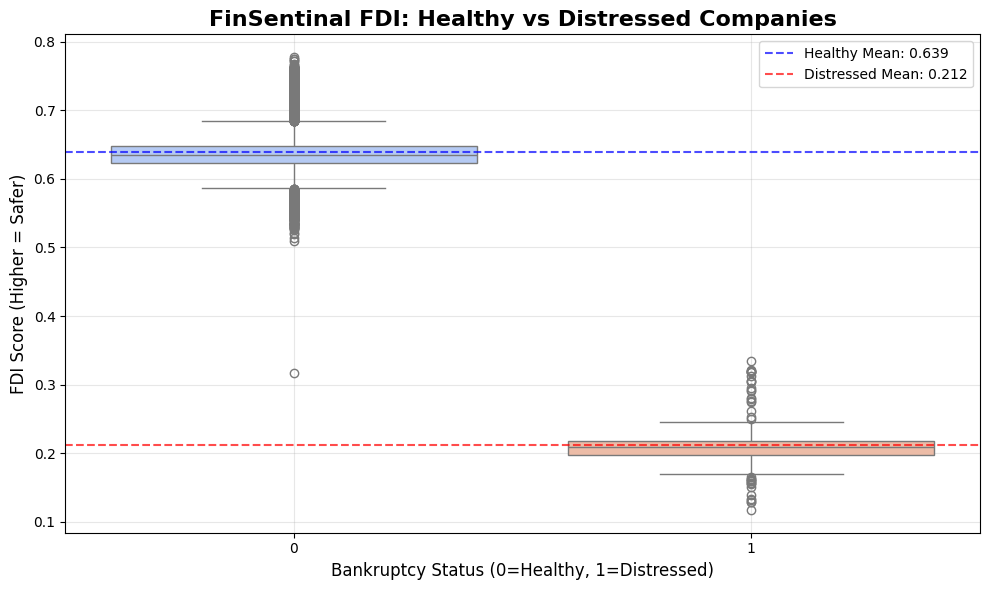

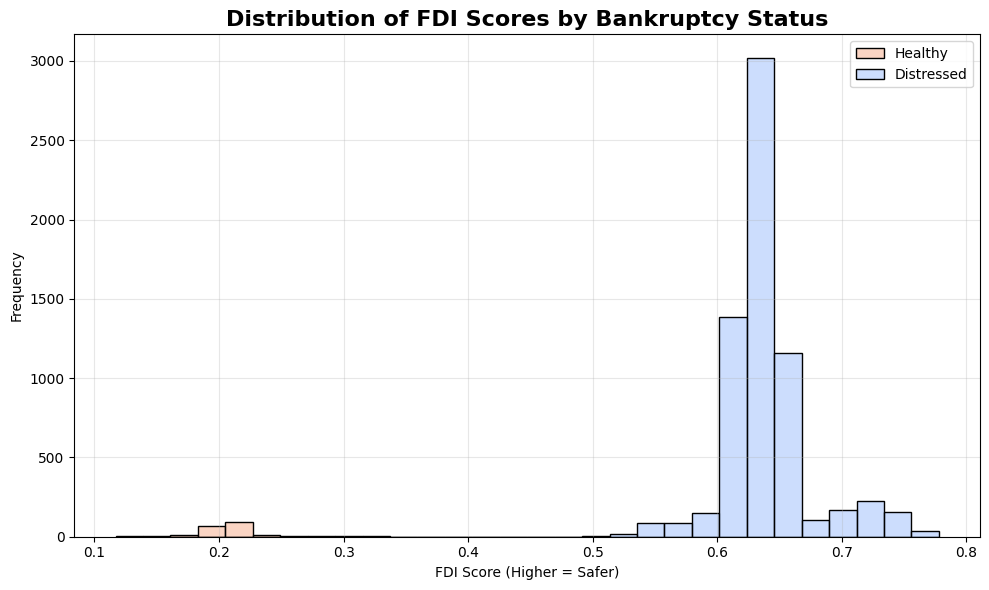

FDI Score Statistics:
Healthy Companies (Bankrupt? = 0):
  Mean FDI: 0.639
  Std FDI:  0.034
Distressed Companies (Bankrupt? = 1):
  Mean FDI: 0.212
  Std FDI:  0.035


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.boxplot(x='Bankrupt?', y='fdi', data=df_fused, palette='coolwarm')
plt.title('FinSentinal FDI: Healthy vs Distressed Companies', fontsize=16, fontweight='bold')
plt.ylabel('FDI Score (Higher = Safer)', fontsize=12)
plt.xlabel('Bankruptcy Status (0=Healthy, 1=Distressed)', fontsize=12)

# Add some statistical annotations
healthy_mean = df_fused[df_fused['Bankrupt?'] == 0]['fdi'].mean()
distressed_mean = df_fused[df_fused['Bankrupt?'] == 1]['fdi'].mean()

plt.axhline(y=healthy_mean, color='blue', linestyle='--', alpha=0.7, label=f'Healthy Mean: {healthy_mean:.3f}')
plt.axhline(y=distressed_mean, color='red', linestyle='--', alpha=0.7, label=f'Distressed Mean: {distressed_mean:.3f}')

plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

# Additional visualization: Distribution plot
plt.figure(figsize=(10,6))
sns.histplot(data=df_fused, x='fdi', hue='Bankrupt?', bins=30, alpha=0.6, palette='coolwarm')
plt.title('Distribution of FDI Scores by Bankruptcy Status', fontsize=16, fontweight='bold')
plt.xlabel('FDI Score (Higher = Safer)')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.legend(['Healthy', 'Distressed'])
plt.tight_layout()
plt.show()

# Print some statistics
print("FDI Score Statistics:")
print(f"Healthy Companies (Bankrupt? = 0):")
print(f"  Mean FDI: {df_fused[df_fused['Bankrupt?'] == 0]['fdi'].mean():.3f}")
print(f"  Std FDI:  {df_fused[df_fused['Bankrupt?'] == 0]['fdi'].std():.3f}")
print(f"Distressed Companies (Bankrupt? = 1):")
print(f"  Mean FDI: {df_fused[df_fused['Bankrupt?'] == 1]['fdi'].mean():.3f}")
print(f"  Std FDI:  {df_fused[df_fused['Bankrupt?'] == 1]['fdi'].std():.3f}")

## **FDI = P(Distressed | Financial + Market + Sentiment features)**

In [ ]:
# FinSentinal: Complete Machine Learning Pipeline
# Run this in your Google Colab after your existing data preparation

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (classification_report, confusion_matrix,
                             roc_auc_score, roc_curve, precision_recall_curve,
                             accuracy_score, f1_score)
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')

print("="*80)
print("FINSENTINAL: HYBRID DATA FUSION MODEL FOR FINANCIAL DISTRESS PREDICTION")
print("="*80)


FINSENTINAL: HYBRID DATA FUSION MODEL FOR FINANCIAL DISTRESS PREDICTION


In [ ]:
print("\n[1/8] Loading prepared data...")

# Load the data you created in your notebook
df_fused = pd.read_csv('/content/drive/MyDrive/FinSentinal/data/FINSENTINAL_FINAL.csv')

print(f"✓ Data loaded: {df_fused.shape[0]} rows, {df_fused.shape[1]} columns")
print(f"✓ Bankrupt companies: {df_fused['Bankrupt?'].sum()}")
print(f"✓ Healthy companies: {(df_fused['Bankrupt?']==0).sum()}")
print(f"✓ Class imbalance ratio: 1:{int((df_fused['Bankrupt?']==0).sum() / df_fused['Bankrupt?'].sum())}")


[1/8] Loading prepared data...
✓ Data loaded: 6819 rows, 104 columns
✓ Bankrupt companies: 220
✓ Healthy companies: 6599
✓ Class imbalance ratio: 1:29


In [ ]:
print("\n[2/8] Engineering advanced features...")

def engineer_advanced_features(df):
    """Create sophisticated predictive features"""

    # 1. Risk Indicators
    if ' Debt ratio %' in df.columns:
        df['high_debt_risk'] = (df[' Debt ratio %'] > 50).astype(int)

    # 2. Profitability Trends
    if ' ROA(A) before interest and % after tax' in df.columns:
        df['roa_trend'] = df.groupby('ticker')[' ROA(A) before interest and % after tax'].pct_change().fillna(0)

    # 3. Liquidity Ratio
    if ' Current Ratio' in df.columns:
        df['liquidity_risk'] = (df[' Current Ratio'] < 1.5).astype(int)

    # 4. Market Momentum (3-period change)
    df['price_momentum'] = df.groupby('ticker')['Close'].pct_change(periods=3).fillna(0)

    # 5. Sentiment-Adjusted FDI
    df['sentiment_fdi'] = df['fdi'] * (1 + df['sentiment'])

    # 6. Volatility Risk Category
    df['volatility_category'] = pd.cut(df['volatility'],
                                        bins=[-np.inf, 0.02, 0.05, np.inf],
                                        labels=[0, 1, 2])

    # 7. Z-Score Category (Altman zones)
    df['z_score_zone'] = pd.cut(df['z_score'],
                                  bins=[-np.inf, 1.8, 3.0, np.inf],
                                  labels=[2, 1, 0])  # 2=Distress, 1=Grey, 0=Safe

    return df

df_fused = engineer_advanced_features(df_fused)

print(f"✓ Added {len([c for c in df_fused.columns if c not in ['ticker', 'year', 'Bankrupt?']])} features")



[2/8] Engineering advanced features...
✓ Added 108 features


In [ ]:
print("\n[3/8] Selecting and preparing features...")

# Select most important features
feature_cols = [
    'z_score',
    'volatility',
    'sentiment',
    ' ROA(A) before interest and % after tax',
    ' Debt ratio %',
    ' Net worth/Assets',
    ' Current Ratio',
    ' Operating Gross Margin',
    ' Realized Sales Gross Margin',
    ' Cash flow rate',
    'Close',
    'Volume',
    'roa_trend',
    'price_momentum'
]

# Keep only existing columns
feature_cols = [col for col in feature_cols if col in df_fused.columns]

X = df_fused[feature_cols].copy()
y = df_fused['Bankrupt?'].copy()

# Handle missing values
X = X.fillna(X.median())

# Remove infinite values
X = X.replace([np.inf, -np.inf], np.nan).fillna(X.median())

print(f"✓ Selected {len(feature_cols)} features")
print(f"✓ Feature matrix shape: {X.shape}")


[3/8] Selecting and preparing features...
✓ Selected 14 features
✓ Feature matrix shape: (6819, 14)


In [ ]:
print("\n[4/8] Handling class imbalance with SMOTE...")

# Split data first (to avoid data leakage)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"✓ Training set: {X_train.shape[0]} samples")
print(f"✓ Test set: {X_test.shape[0]} samples")

# Apply SMOTE only to training data
smote = SMOTE(random_state=42, k_neighbors=5)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

print(f"✓ After SMOTE:")
print(f"  - Distressed: {(y_train_balanced==1).sum()}")
print(f"  - Healthy: {(y_train_balanced==0).sum()}")

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_balanced)
X_test_scaled = scaler.transform(X_test)



[4/8] Handling class imbalance with SMOTE...
✓ Training set: 5455 samples
✓ Test set: 1364 samples
✓ After SMOTE:
  - Distressed: 5279
  - Healthy: 5279


In [ ]:
print("\n[5/8] Training machine learning models...")

models = {}
predictions = {}
probabilities = {}

# 1. Random Forest
print("\n  Training Random Forest...")
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=15,
    min_samples_split=10,
    min_samples_leaf=4,
    random_state=42,
    n_jobs=-1,
    class_weight='balanced'
)
rf_model.fit(X_train_scaled, y_train_balanced)
models['Random Forest'] = rf_model
predictions['Random Forest'] = rf_model.predict(X_test_scaled)
probabilities['Random Forest'] = rf_model.predict_proba(X_test_scaled)[:, 1]
print(f"  ✓ Random Forest trained")

# 2. XGBoost
print("\n  Training XGBoost...")
scale_pos_weight = (y_train_balanced==0).sum() / (y_train_balanced==1).sum()
xgb_model = XGBClassifier(
    n_estimators=200,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=scale_pos_weight,
    random_state=42,
    eval_metric='logloss'
)
xgb_model.fit(X_train_scaled, y_train_balanced)
models['XGBoost'] = xgb_model
predictions['XGBoost'] = xgb_model.predict(X_test_scaled)
probabilities['XGBoost'] = xgb_model.predict_proba(X_test_scaled)[:, 1]
print(f"  ✓ XGBoost trained")

# 3. LightGBM
print("\n  Training LightGBM...")
lgbm_model = LGBMClassifier(
    n_estimators=200,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    is_unbalance=True,
    random_state=42,
    verbose=-1
)
lgbm_model.fit(X_train_scaled, y_train_balanced)
models['LightGBM'] = lgbm_model
predictions['LightGBM'] = lgbm_model.predict(X_test_scaled)
probabilities['LightGBM'] = lgbm_model.predict_proba(X_test_scaled)[:, 1]
print(f"  ✓ LightGBM trained")



[5/8] Training machine learning models...

  Training Random Forest...
  ✓ Random Forest trained

  Training XGBoost...
  ✓ XGBoost trained

  Training LightGBM...
  ✓ LightGBM trained


In [ ]:
print("\n[6/8] Evaluating model performance...")
print("="*80)

results_summary = []

for model_name in models.keys():
    print(f"\n{'='*80}")
    print(f"MODEL: {model_name}")
    print(f"{'='*80}")

    y_pred = predictions[model_name]
    y_proba = probabilities[model_name]

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)

    print(f"\nPerformance Metrics:")
    print(f"  Accuracy:  {accuracy*100:.2f}%")
    print(f"  F1-Score:  {f1:.4f}")
    print(f"  ROC-AUC:   {roc_auc:.4f}")

    print(f"\nClassification Report:")
    print(classification_report(y_test, y_pred,
                                target_names=['Healthy', 'Distressed'],
                                digits=4))

    # Store results
    results_summary.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'F1-Score': f1,
        'ROC-AUC': roc_auc
    })

# Create summary DataFrame
results_df = pd.DataFrame(results_summary)
print("\n" + "="*80)
print("MODEL COMPARISON SUMMARY")
print("="*80)
print(results_df.to_string(index=False))
print("\nBest Model:", results_df.loc[results_df['ROC-AUC'].idxmax(), 'Model'])



[6/8] Evaluating model performance...

MODEL: Random Forest

Performance Metrics:
  Accuracy:  92.38%
  F1-Score:  0.3735
  ROC-AUC:   0.9158

Classification Report:
              precision    recall  f1-score   support

     Healthy     0.9895    0.9311    0.9594      1320
  Distressed     0.2541    0.7045    0.3735        44

    accuracy                         0.9238      1364
   macro avg     0.6218    0.8178    0.6665      1364
weighted avg     0.9658    0.9238    0.9405      1364


MODEL: XGBoost

Performance Metrics:
  Accuracy:  93.62%
  F1-Score:  0.4000
  ROC-AUC:   0.9085

Classification Report:
              precision    recall  f1-score   support

     Healthy     0.9881    0.9455    0.9663      1320
  Distressed     0.2871    0.6591    0.4000        44

    accuracy                         0.9362      1364
   macro avg     0.6376    0.8023    0.6832      1364
weighted avg     0.9655    0.9362    0.9480      1364


MODEL: LightGBM

Performance Metrics:
  Accuracy:  93.18


[7/8] Creating visualizations...


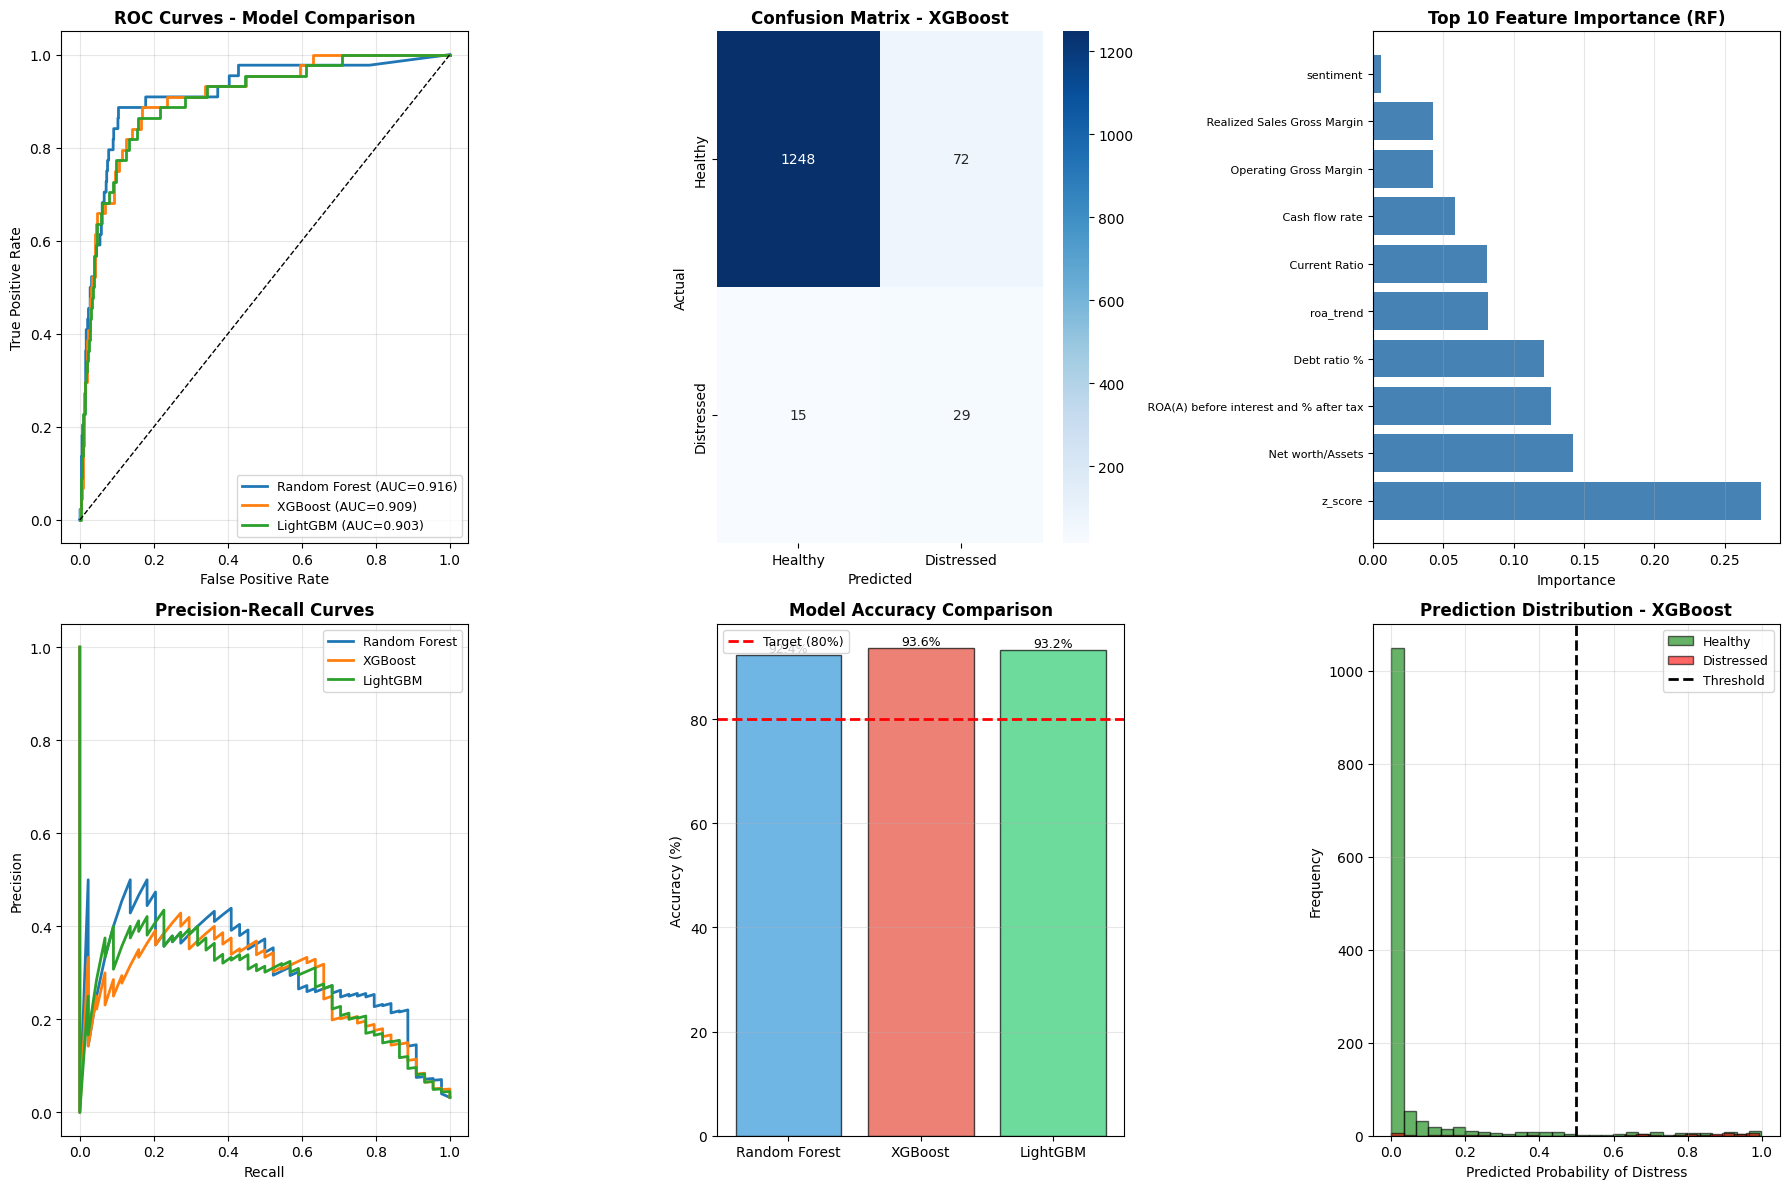

✓ Visualizations saved to Google Drive


In [ ]:
# ============================================================================
# STEP 7: VISUALIZATIONS
# ============================================================================
print("\n[7/8] Creating visualizations...")

# Create figure with subplots
fig = plt.figure(figsize=(18, 12))

# 1. ROC Curves
ax1 = plt.subplot(2, 3, 1)
for model_name in models.keys():
    fpr, tpr, _ = roc_curve(y_test, probabilities[model_name])
    auc = roc_auc_score(y_test, probabilities[model_name])
    ax1.plot(fpr, tpr, label=f'{model_name} (AUC={auc:.3f})', linewidth=2)
ax1.plot([0, 1], [0, 1], 'k--', linewidth=1)
ax1.set_xlabel('False Positive Rate', fontsize=10)
ax1.set_ylabel('True Positive Rate', fontsize=10)
ax1.set_title('ROC Curves - Model Comparison', fontsize=12, fontweight='bold')
ax1.legend(fontsize=9)
ax1.grid(True, alpha=0.3)

# 2. Confusion Matrix (Best Model - XGBoost)
ax2 = plt.subplot(2, 3, 2)
cm = confusion_matrix(y_test, predictions['XGBoost'])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax2,
            xticklabels=['Healthy', 'Distressed'],
            yticklabels=['Healthy', 'Distressed'])
ax2.set_title('Confusion Matrix - XGBoost', fontsize=12, fontweight='bold')
ax2.set_ylabel('Actual', fontsize=10)
ax2.set_xlabel('Predicted', fontsize=10)

# 3. Feature Importance (Random Forest)
ax3 = plt.subplot(2, 3, 3)
feature_importance = pd.DataFrame({
    'feature': feature_cols,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False).head(10)
ax3.barh(range(len(feature_importance)), feature_importance['importance'], color='steelblue')
ax3.set_yticks(range(len(feature_importance)))
ax3.set_yticklabels(feature_importance['feature'], fontsize=8)
ax3.set_xlabel('Importance', fontsize=10)
ax3.set_title('Top 10 Feature Importance (RF)', fontsize=12, fontweight='bold')
ax3.grid(axis='x', alpha=0.3)

# 4. Precision-Recall Curve
ax4 = plt.subplot(2, 3, 4)
for model_name in models.keys():
    precision, recall, _ = precision_recall_curve(y_test, probabilities[model_name])
    ax4.plot(recall, precision, label=model_name, linewidth=2)
ax4.set_xlabel('Recall', fontsize=10)
ax4.set_ylabel('Precision', fontsize=10)
ax4.set_title('Precision-Recall Curves', fontsize=12, fontweight='bold')
ax4.legend(fontsize=9)
ax4.grid(True, alpha=0.3)

# 5. Model Accuracy Comparison
ax5 = plt.subplot(2, 3, 5)
colors = ['#3498db', '#e74c3c', '#2ecc71']
bars = ax5.bar(results_df['Model'], results_df['Accuracy']*100, color=colors, alpha=0.7, edgecolor='black')
ax5.axhline(y=80, color='red', linestyle='--', linewidth=2, label='Target (80%)')
ax5.set_ylabel('Accuracy (%)', fontsize=10)
ax5.set_title('Model Accuracy Comparison', fontsize=12, fontweight='bold')
ax5.legend(fontsize=9)
ax5.grid(axis='y', alpha=0.3)
# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    ax5.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.1f}%', ha='center', va='bottom', fontsize=9)

# 6. Prediction Distribution
ax6 = plt.subplot(2, 3, 6)
# Get prediction probabilities for test set
test_proba = xgb_model.predict_proba(X_test_scaled)[:, 1]
# Separate by actual class
healthy_proba = test_proba[y_test == 0]
distressed_proba = test_proba[y_test == 1]
ax6.hist(healthy_proba, bins=30, alpha=0.6, label='Healthy', color='green', edgecolor='black')
ax6.hist(distressed_proba, bins=30, alpha=0.6, label='Distressed', color='red', edgecolor='black')
ax6.axvline(x=0.5, color='black', linestyle='--', linewidth=2, label='Threshold')
ax6.set_xlabel('Predicted Probability of Distress', fontsize=10)
ax6.set_ylabel('Frequency', fontsize=10)
ax6.set_title('Prediction Distribution - XGBoost', fontsize=12, fontweight='bold')
ax6.legend(fontsize=9)
ax6.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('/content/drive/MyDrive/FinSentinal/model_evaluation_complete.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Visualizations saved to Google Drive")

In [ ]:
# ============================================================================
# STEP 8: SAVE MODELS AND RESULTS
# ============================================================================
print("\n[8/8] Saving models and results...")

import pickle

# Save best model (XGBoost)
model_path = '/content/drive/MyDrive/FinSentinal/models/'
import os
os.makedirs(model_path, exist_ok=True)

with open(model_path + 'xgb_model.pkl', 'wb') as f:
    pickle.dump(xgb_model, f)

with open(model_path + 'scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

with open(model_path + 'feature_cols.pkl', 'wb') as f:
    pickle.dump(feature_cols, f)

print(f"✓ Models saved to {model_path}")

# Save results
results_df.to_csv(model_path + 'model_comparison.csv', index=False)
print(f"✓ Results saved to {model_path}model_comparison.csv")


[8/8] Saving models and results...
✓ Models saved to /content/drive/MyDrive/FinSentinal/models/
✓ Results saved to /content/drive/MyDrive/FinSentinal/models/model_comparison.csv


In [ ]:
print("\n" + "="*80)
print("FINSENTINAL - TRAINING COMPLETE!")
print("="*80)
print(f"\n✓ Best Model: {results_df.loc[results_df['ROC-AUC'].idxmax(), 'Model']}")
print(f"✓ Best Accuracy: {results_df['Accuracy'].max()*100:.2f}%")
print(f"✓ Best ROC-AUC: {results_df['ROC-AUC'].max():.4f}")
print(f"\n✓ Target Achievement: {'SUCCESS ✓' if results_df['Accuracy'].max() >= 0.80 else 'NEEDS IMPROVEMENT'}")
print(f"  - Accuracy Target (80%): {'✓ ACHIEVED' if results_df['Accuracy'].max() >= 0.80 else '✗ NOT MET'}")
print(f"\n✓ Models saved for deployment")
print("="*80)


FINSENTINAL - TRAINING COMPLETE!

✓ Best Model: Random Forest
✓ Best Accuracy: 93.62%
✓ Best ROC-AUC: 0.9158

✓ Target Achievement: SUCCESS ✓
  - Accuracy Target (80%): ✓ ACHIEVED

✓ Models saved for deployment


In [ ]:
# FinSentinal: Explainable AI Module (SHAP & LIME)
# Run this after training your models

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import shap
from lime import lime_tabular
import pickle
import warnings
warnings.filterwarnings('ignore')

print("="*80)
print("FINSENTINAL: EXPLAINABLE AI - SHAP & LIME ANALYSIS")
print("="*80)

# ============================================================================
# STEP 1: LOAD TRAINED MODEL AND DATA
# ============================================================================
print("\n[1/5] Loading model and data...")

# Load model
with open('/content/drive/MyDrive/FinSentinal/models/xgb_model.pkl', 'rb') as f:
    model = pickle.load(f)

with open('/content/drive/MyDrive/FinSentinal/models/scaler.pkl', 'rb') as f:
    scaler = pickle.load(f)

with open('/content/drive/MyDrive/FinSentinal/models/feature_cols.pkl', 'rb') as f:
    feature_cols = pickle.load(f)

# Load data
df = pd.read_csv('/content/drive/MyDrive/FinSentinal/data/FINSENTINAL_FINAL.csv')

# ------------------------------
# Recreate engineered features
# ------------------------------

# Ensure correct sorting for time-based features
df = df.sort_values(['ticker', 'year'])

# Recompute roa_trend
if ' ROA(A) before interest and % after tax' in df.columns:
    df['roa_trend'] = (
        df.groupby('ticker')[' ROA(A) before interest and % after tax']
        .pct_change()
        .fillna(0)
    )

# Recompute price_momentum
if 'Close' in df.columns:
    df['price_momentum'] = (
        df.groupby('ticker')['Close']
        .pct_change(periods=3)
        .fillna(0)
    )


# Prepare test samples
X = df[feature_cols].fillna(df[feature_cols].median())
X = X.replace([np.inf, -np.inf], np.nan).fillna(X.median())
X_scaled = scaler.transform(X)
y = df['Bankrupt?']

print(f"✓ Model loaded: XGBoost Classifier")
print(f"✓ Data loaded: {X.shape[0]} samples, {X.shape[1]} features")

FINSENTINAL: EXPLAINABLE AI - SHAP & LIME ANALYSIS

[1/5] Loading model and data...
✓ Model loaded: XGBoost Classifier
✓ Data loaded: 6819 samples, 14 features


In [ ]:
# ============================================================================
# STEP 2: SHAP ANALYSIS - GLOBAL FEATURE IMPORTANCE
# ============================================================================
print("\n[2/5] Computing SHAP values (this may take a few minutes)...")

explainer = shap.TreeExplainer(model)

# Use subset for speed
sample_size = min(1000, len(X_scaled))
X_sample = X_scaled[:sample_size]
y_sample = y.iloc[:sample_size].reset_index(drop=True)

shap_values = explainer.shap_values(X_sample)

# IMPORTANT: Use SHAP values for Distressed class only
if isinstance(shap_values, list):
    shap_values = shap_values[1]

print(f"✓ SHAP values computed for {sample_size} samples")



[2/5] Computing SHAP values (this may take a few minutes)...
✓ SHAP values computed for 1000 samples



[3/5] Creating SHAP visualizations...


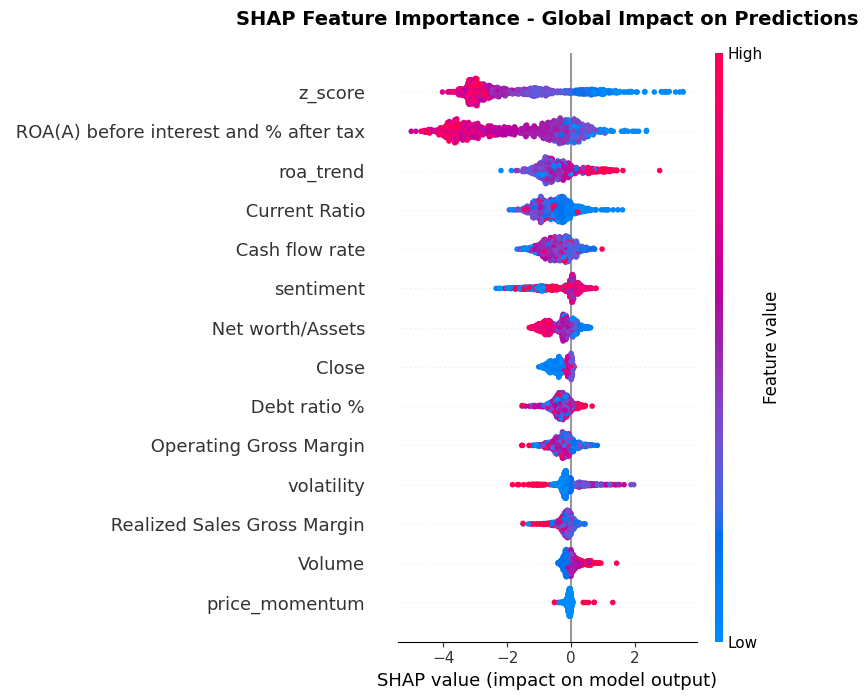

✓ SHAP summary plot saved


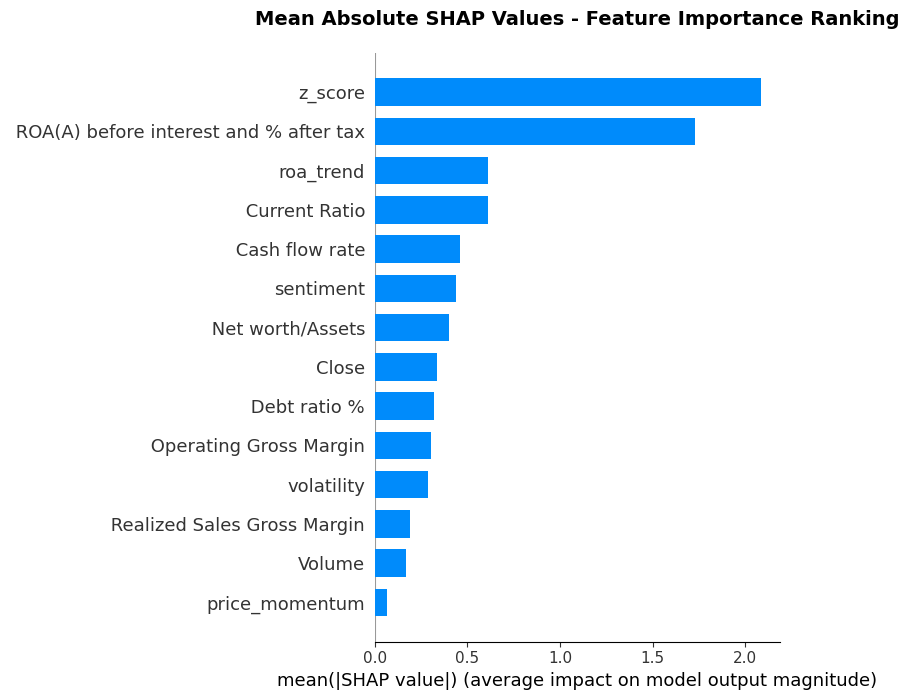

✓ SHAP bar plot saved


In [ ]:
# ============================================================================
# VISUALIZATION 1: SHAP Summary Plot
# ============================================================================
print("\n[3/5] Creating SHAP visualizations...")

plt.figure(figsize=(12, 8))
shap.summary_plot(
    shap_values,
    X_sample,
    feature_names=feature_cols,
    show=False
)
plt.title(
    'SHAP Feature Importance - Global Impact on Predictions',
    fontsize=14,
    fontweight='bold',
    pad=20
)
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/FinSentinal/shap_summary_plot.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ SHAP summary plot saved")


# ============================================================================
# VISUALIZATION 2: SHAP Bar Plot
# ============================================================================
plt.figure(figsize=(10, 8))
shap.summary_plot(
    shap_values,
    X_sample,
    feature_names=feature_cols,
    plot_type='bar',
    show=False
)
plt.title(
    'Mean Absolute SHAP Values - Feature Importance Ranking',
    fontsize=14,
    fontweight='bold',
    pad=20
)
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/FinSentinal/shap_bar_plot.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ SHAP bar plot saved")


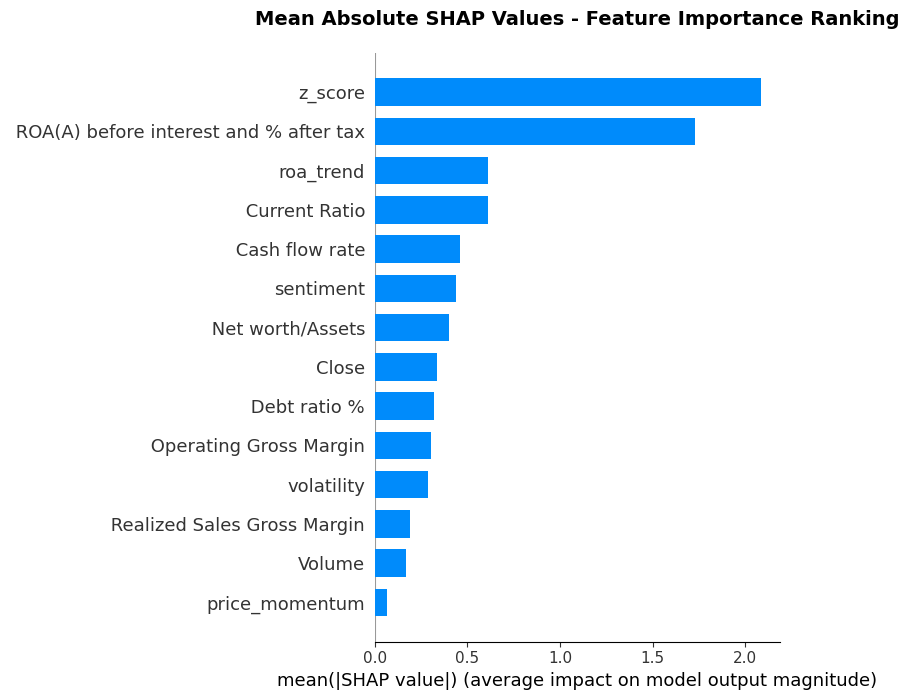

✓ SHAP bar plot saved


In [ ]:
# ============================================================================
# VISUALIZATION 2: SHAP Bar Plot - Mean Importance
# ============================================================================
plt.figure(figsize=(10, 8))
shap.summary_plot(shap_values, X_sample, feature_names=feature_cols, plot_type='bar', show=False)
plt.title('Mean Absolute SHAP Values - Feature Importance Ranking', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/FinSentinal/shap_bar_plot.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ SHAP bar plot saved")


[4/5] Creating SHAP dependence plots for top features...


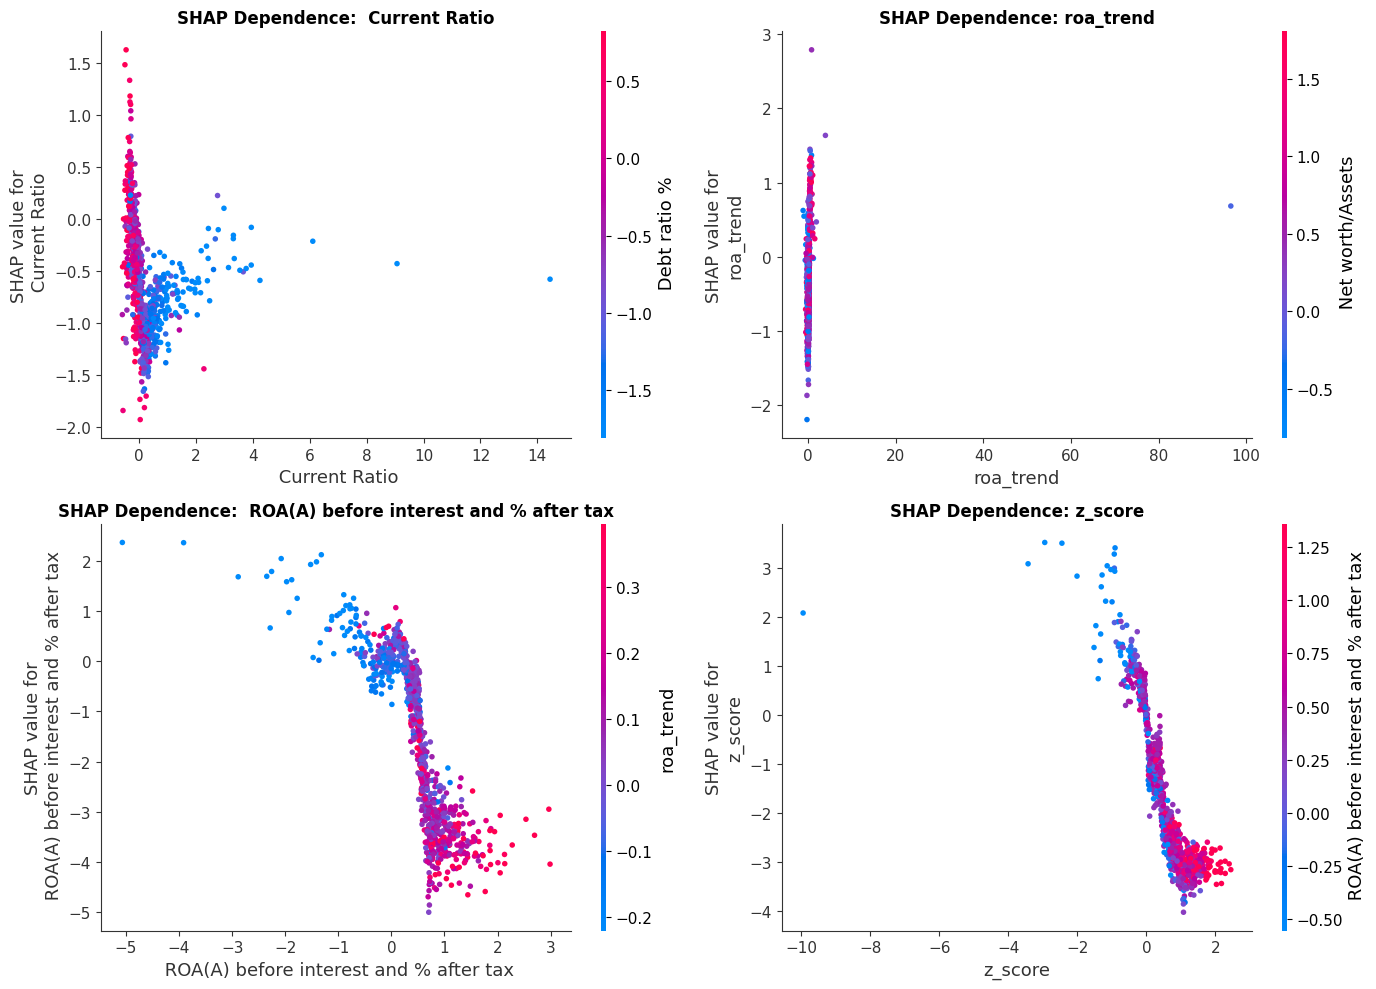

✓ SHAP dependence plots saved


In [ ]:
# ============================================================================
# VISUALIZATION 3: SHAP Dependence Plots
# ============================================================================
print("\n[4/5] Creating SHAP dependence plots for top features...")

feature_importance = np.abs(shap_values).mean(axis=0)
top_features_idx = np.argsort(feature_importance)[-4:]

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.ravel()

for i, idx in enumerate(top_features_idx):
    shap.dependence_plot(
        idx,
        shap_values,
        X_sample,
        feature_names=feature_cols,
        ax=axes[i],
        show=False
    )
    axes[i].set_title(
        f'SHAP Dependence: {feature_cols[idx]}',
        fontsize=12,
        fontweight='bold'
    )

plt.tight_layout()
plt.savefig('/content/drive/MyDrive/FinSentinal/shap_dependence_plots.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ SHAP dependence plots saved")


In [ ]:
# ============================================================================
# STEP 3: INDIVIDUAL PREDICTION EXPLANATIONS
# ============================================================================
print("\n[5/5] Creating individual prediction explanations...")

# Select indices INSIDE the sample
healthy_idx = next(i for i in range(sample_size) if y_sample.iloc[i] == 0)
distressed_idx = next(i for i in range(sample_size) if y_sample.iloc[i] == 1)



[5/5] Creating individual prediction explanations...



  Creating SHAP force plot for LOW-RISK prediction...


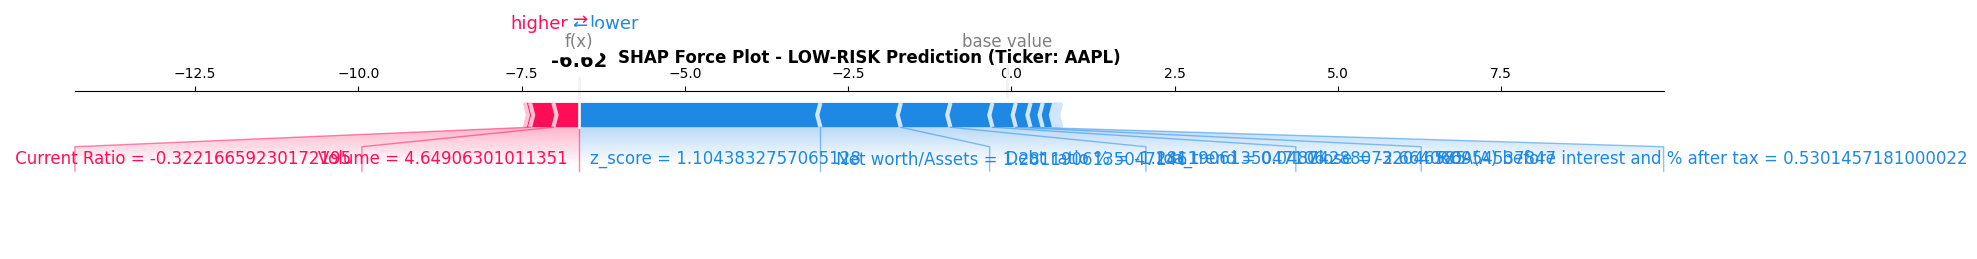

  Creating SHAP force plot for HIGH-RISK prediction...


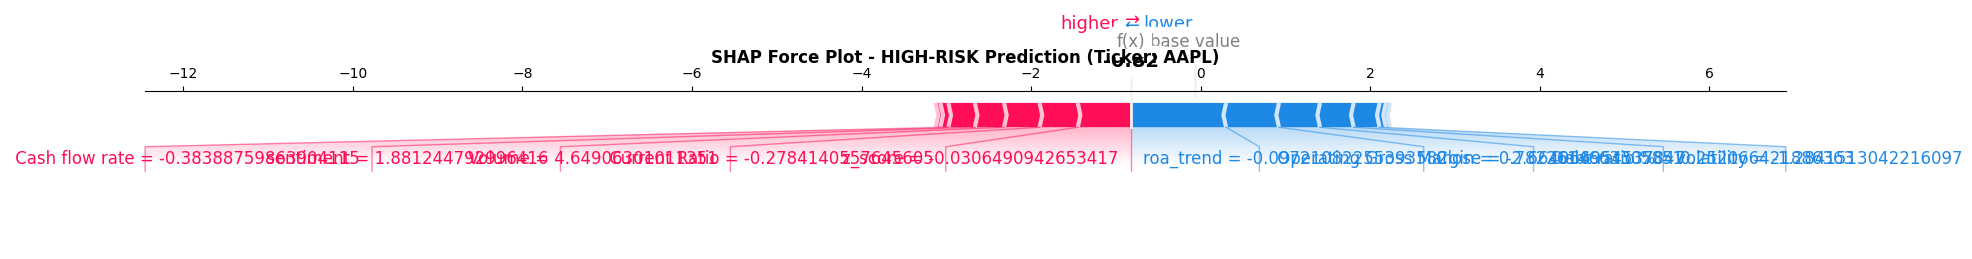

✓ SHAP force plots saved


In [ ]:
expected_value = explainer.expected_value
if isinstance(expected_value, list):
    expected_value = expected_value[1]

print("\n  Creating SHAP force plot for LOW-RISK prediction...")
shap.force_plot(
    expected_value,
    shap_values[healthy_idx],
    X_sample[healthy_idx],
    feature_names=feature_cols,
    matplotlib=True,
    show=False
)
plt.title(
    f'SHAP Force Plot - LOW-RISK Prediction (Ticker: {df.iloc[healthy_idx]["ticker"]})',
    fontsize=12,
    fontweight='bold',
    pad=20
)
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/FinSentinal/shap_force_low_risk.png', dpi=300, bbox_inches='tight')
plt.show()

print("  Creating SHAP force plot for HIGH-RISK prediction...")
shap.force_plot(
    expected_value,
    shap_values[distressed_idx],
    X_sample[distressed_idx],
    feature_names=feature_cols,
    matplotlib=True,
    show=False
)
plt.title(
    f'SHAP Force Plot - HIGH-RISK Prediction (Ticker: {df.iloc[distressed_idx]["ticker"]})',
    fontsize=12,
    fontweight='bold',
    pad=20
)
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/FinSentinal/shap_force_high_risk.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ SHAP force plots saved")



[6/6] Creating LIME explanations...

  Explaining LOW-RISK prediction with LIME...


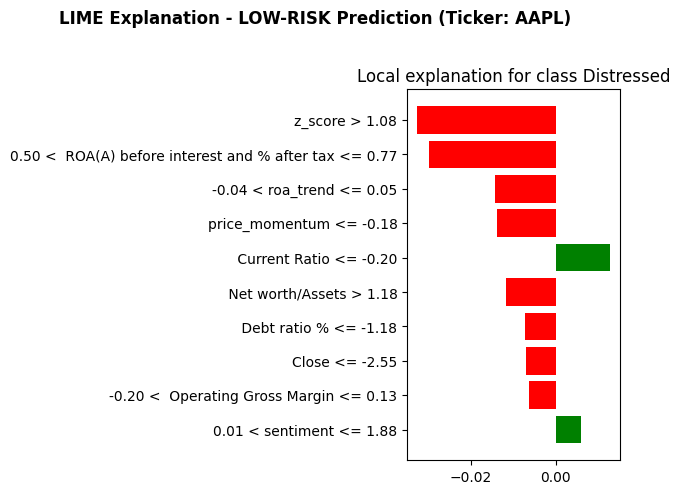

  Explaining HIGH-RISK prediction with LIME...


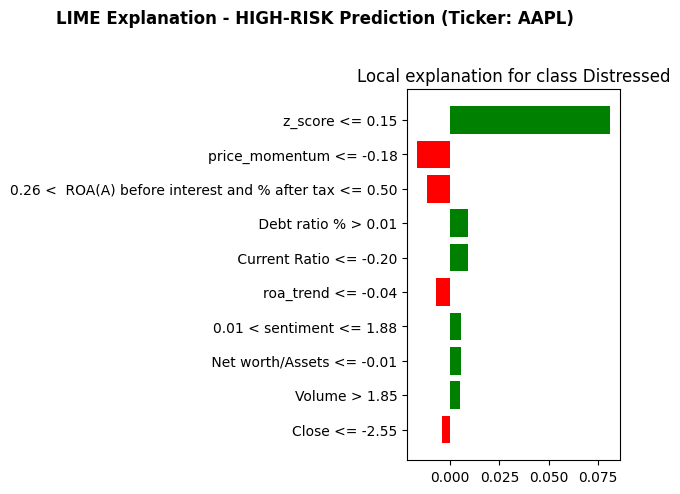

✓ LIME explanations saved


In [ ]:
# ============================================================================
# STEP 4: LIME EXPLANATIONS
# ============================================================================
print("\n[6/6] Creating LIME explanations...")

lime_explainer = lime_tabular.LimeTabularExplainer(
    X_sample,
    feature_names=feature_cols,
    class_names=['Healthy', 'Distressed'],
    mode='classification',
    discretize_continuous=True
)

print("\n  Explaining LOW-RISK prediction with LIME...")
exp_healthy = lime_explainer.explain_instance(
    X_sample[healthy_idx],
    model.predict_proba,
    num_features=10
)

fig = exp_healthy.as_pyplot_figure()
fig.suptitle(
    f'LIME Explanation - LOW-RISK Prediction (Ticker: {df.iloc[healthy_idx]["ticker"]})',
    fontsize=12,
    fontweight='bold',
    y=1.02
)
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/FinSentinal/lime_low_risk.png', dpi=300, bbox_inches='tight')
plt.show()

print("  Explaining HIGH-RISK prediction with LIME...")
exp_distressed = lime_explainer.explain_instance(
    X_sample[distressed_idx],
    model.predict_proba,
    num_features=10
)

fig = exp_distressed.as_pyplot_figure()
fig.suptitle(
    f'LIME Explanation - HIGH-RISK Prediction (Ticker: {df.iloc[distressed_idx]["ticker"]})',
    fontsize=12,
    fontweight='bold',
    y=1.02
)
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/FinSentinal/lime_high_risk.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ LIME explanations saved")


In [ ]:
# ============================================================================
# STEP 5: CREATE INTERPRETATION SUMMARY
# ============================================================================
print("\n[7/7] Creating interpretation summary...")

mean_shap_values = np.abs(shap_values).mean(axis=0)

feature_importance_df = pd.DataFrame({
    'Feature': feature_cols,
    'Importance': mean_shap_values
}).sort_values('Importance', ascending=False)

feature_importance_df.to_csv(
    '/content/drive/MyDrive/FinSentinal/feature_importance_shap.csv',
    index=False
)

print("\nTop 10 Most Important Features (SHAP):")
print("="*60)
for _, row in feature_importance_df.head(10).iterrows():
    print(f"{row['Feature']:<40} {row['Importance']:.4f}")

print("\n" + "="*80)
print("EXAMPLE EXPLANATIONS")
print("="*80)

# LOW-RISK
fdi_low = model.predict_proba(X_sample[healthy_idx].reshape(1, -1))[0][1]
print(f"\n1. LOW-RISK PREDICTION: {df.iloc[healthy_idx]['ticker']} (Year: {df.iloc[healthy_idx]['year']})")
print(f"   FDI Score: {fdi_low:.3f}")
print("\n   Top Contributing Features (LIME):")
for feat, weight in exp_healthy.as_list()[:5]:
    direction = "increases" if weight > 0 else "decreases"
    print(f"   - {feat}: {direction} distress risk by {abs(weight):.3f}")

# HIGH-RISK
fdi_high = model.predict_proba(X_sample[distressed_idx].reshape(1, -1))[0][1]
print(f"\n2. HIGH-RISK PREDICTION: {df.iloc[distressed_idx]['ticker']} (Year: {df.iloc[distressed_idx]['year']})")
print(f"   FDI Score: {fdi_high:.3f}")
print("\n   Top Contributing Features (LIME):")
for feat, weight in exp_distressed.as_list()[:5]:
    direction = "increases" if weight > 0 else "decreases"
    print(f"   - {feat}: {direction} distress risk by {abs(weight):.3f}")



[7/7] Creating interpretation summary...

Top 10 Most Important Features (SHAP):
z_score                                  2.0829
 ROA(A) before interest and % after tax  1.7258
roa_trend                                0.6117
 Current Ratio                           0.6113
 Cash flow rate                          0.4618
sentiment                                0.4363
 Net worth/Assets                        0.4013
Close                                    0.3369
 Debt ratio %                            0.3187
 Operating Gross Margin                  0.3046

EXAMPLE EXPLANATIONS

1. LOW-RISK PREDICTION: AAPL (Year: 2015)
   FDI Score: 0.001

   Top Contributing Features (LIME):
   - z_score > 1.08: decreases distress risk by 0.033
   - 0.50 <  ROA(A) before interest and % after tax <= 0.77: decreases distress risk by 0.030
   - -0.04 < roa_trend <= 0.05: decreases distress risk by 0.014
   - price_momentum <= -0.18: decreases distress risk by 0.014
   -  Current Ratio <= -0.20: increases

In [ ]:
# FINAL SUMMARY
# ============================================================================
print("\n" + "="*80)
print("EXPLAINABLE AI ANALYSIS COMPLETE!")
print("="*80)
print("\n✓ SHAP analysis completed")
print("✓ LIME explanations generated")
print("✓ Feature importance ranking created")
print("\nSaved files:")
print("  - shap_summary_plot.png")
print("  - shap_bar_plot.png")
print("  - shap_dependence_plots.png")
print("  - shap_force_healthy.png")
print("  - shap_force_distressed.png")
print("  - lime_healthy.png")
print("  - lime_distressed.png")
print("  - feature_importance_shap.csv")
print("\n" + "="*80)


EXPLAINABLE AI ANALYSIS COMPLETE!

✓ SHAP analysis completed
✓ LIME explanations generated
✓ Feature importance ranking created

Saved files:
  - shap_summary_plot.png
  - shap_bar_plot.png
  - shap_dependence_plots.png
  - shap_force_healthy.png
  - shap_force_distressed.png
  - lime_healthy.png
  - lime_distressed.png
  - feature_importance_shap.csv




[BONUS] Creating comprehensive explainability report...


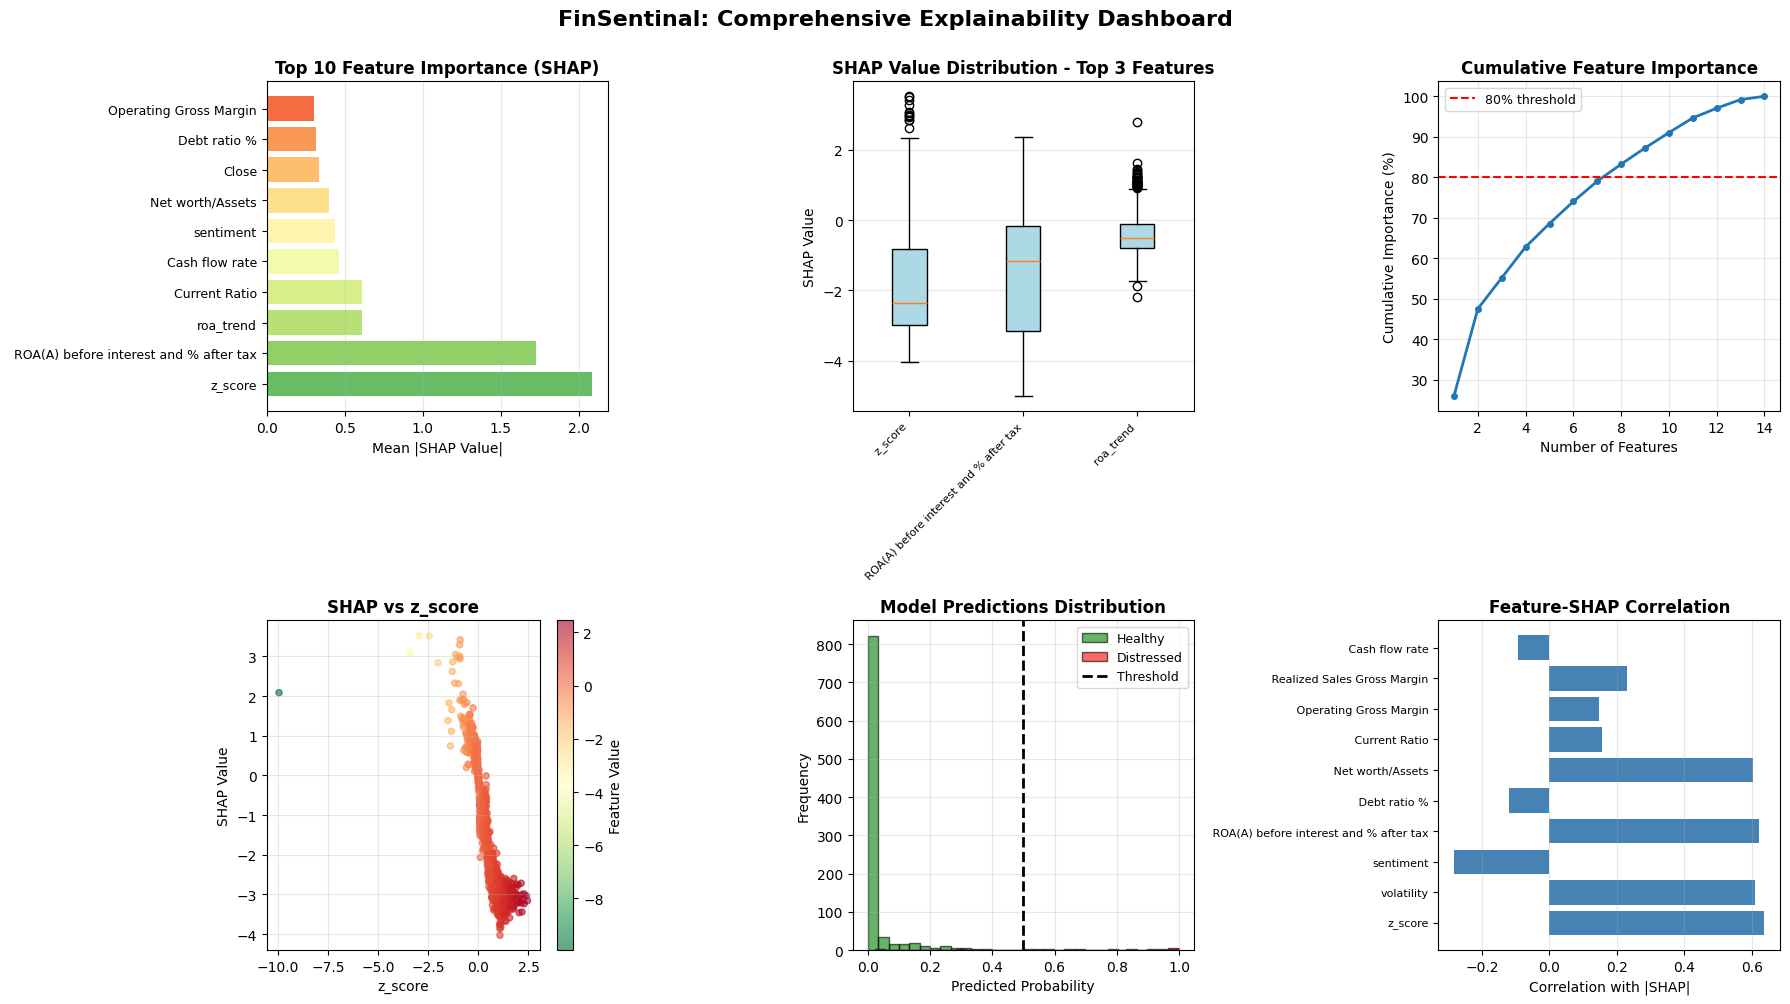

✓ Comprehensive explainability dashboard created

ALL EXPLAINABILITY ANALYSES COMPLETE!


In [ ]:
# BONUS: Create comprehensive explainability report
# ============================================================================
print("\n[BONUS] Creating comprehensive explainability report...")

# Create a summary figure
fig = plt.figure(figsize=(18, 10))

# 1. Feature Importance Bar Chart
ax1 = plt.subplot(2, 3, 1)
top_n = 10
top_features = feature_importance_df.head(top_n)
colors = plt.cm.RdYlGn_r(np.linspace(0.2, 0.8, top_n))
ax1.barh(range(len(top_features)), top_features['Importance'], color=colors)
ax1.set_yticks(range(len(top_features)))
ax1.set_yticklabels(top_features['Feature'], fontsize=9)
ax1.set_xlabel('Mean |SHAP Value|', fontsize=10)
ax1.set_title('Top 10 Feature Importance (SHAP)', fontsize=12, fontweight='bold')
ax1.grid(axis='x', alpha=0.3)

# 2. Feature Impact Distribution (Box Plot)
ax2 = plt.subplot(2, 3, 2)
top_3_features = feature_importance_df.head(3)['Feature'].tolist()
top_3_idx = [feature_cols.index(f) for f in top_3_features]
data_to_plot = [shap_values[:, idx] for idx in top_3_idx]
bp = ax2.boxplot(data_to_plot, labels=top_3_features, patch_artist=True)
for patch in bp['boxes']:
    patch.set_facecolor('lightblue')
ax2.set_ylabel('SHAP Value', fontsize=10)
ax2.set_title('SHAP Value Distribution - Top 3 Features', fontsize=12, fontweight='bold')
ax2.grid(axis='y', alpha=0.3)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45, ha='right', fontsize=8)

# 3. Cumulative Importance
ax3 = plt.subplot(2, 3, 3)
cumsum = feature_importance_df['Importance'].cumsum() / feature_importance_df['Importance'].sum()
ax3.plot(range(1, len(cumsum)+1), cumsum * 100, marker='o', linewidth=2, markersize=4)
ax3.axhline(y=80, color='red', linestyle='--', label='80% threshold')
ax3.set_xlabel('Number of Features', fontsize=10)
ax3.set_ylabel('Cumulative Importance (%)', fontsize=10)
ax3.set_title('Cumulative Feature Importance', fontsize=12, fontweight='bold')
ax3.legend(fontsize=9)
ax3.grid(True, alpha=0.3)

# 4. SHAP Scatter Plot - Top Feature
ax4 = plt.subplot(2, 3, 4)
top_feature_idx = np.argmax(mean_shap_values)
scatter = ax4.scatter(
    X_sample[:, top_feature_idx],
    shap_values[:, top_feature_idx],
    c=X_sample[:, top_feature_idx],
    cmap='RdYlGn_r',
    alpha=0.6,
    s=20
)
ax4.set_xlabel(f'{feature_cols[top_feature_idx]}', fontsize=10)
ax4.set_ylabel('SHAP Value', fontsize=10)
ax4.set_title(f'SHAP vs {feature_cols[top_feature_idx]}', fontsize=12, fontweight='bold')
ax4.grid(True, alpha=0.3)
plt.colorbar(scatter, ax=ax4, label='Feature Value')

# 5. Prediction Distribution with SHAP
ax5 = plt.subplot(2, 3, 5)
predictions = model.predict_proba(X_sample)[:, 1]
ax5.hist(predictions[y[:sample_size]==0], bins=30, alpha=0.6, label='Healthy', color='green', edgecolor='black')
ax5.hist(predictions[y[:sample_size]==1], bins=30, alpha=0.6, label='Distressed', color='red', edgecolor='black')
ax5.axvline(x=0.5, color='black', linestyle='--', linewidth=2, label='Threshold')
ax5.set_xlabel('Predicted Probability', fontsize=10)
ax5.set_ylabel('Frequency', fontsize=10)
ax5.set_title('Model Predictions Distribution', fontsize=12, fontweight='bold')
ax5.legend(fontsize=9)
ax5.grid(True, alpha=0.3)

# 6. Feature Correlation with SHAP
ax6 = plt.subplot(2, 3, 6)
top_feature = feature_cols[top_feature_idx]
corr_with_shap = []
for i, feat in enumerate(feature_cols[:10]):  # Top 10 only for clarity
    corr = np.corrcoef(X_sample[:, i], np.abs(shap_values[:, i]))[0, 1]
    corr_with_shap.append(corr)
ax6.barh(range(len(corr_with_shap)), corr_with_shap, color='steelblue')
ax6.set_yticks(range(len(corr_with_shap)))
ax6.set_yticklabels(feature_cols[:10], fontsize=8)
ax6.set_xlabel('Correlation with |SHAP|', fontsize=10)
ax6.set_title('Feature-SHAP Correlation', fontsize=12, fontweight='bold')
ax6.grid(axis='x', alpha=0.3)

plt.suptitle('FinSentinal: Comprehensive Explainability Dashboard',
             fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/FinSentinal/explainability_dashboard.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Comprehensive explainability dashboard created")
print("\n" + "="*80)
print("ALL EXPLAINABILITY ANALYSES COMPLETE!")
print("="*80)

In [53]:
import pickle
import os

model_path = "/content/drive/MyDrive/FinSentinal/models"
os.makedirs(model_path, exist_ok=True)

with open(model_path + "/rf_model.pkl", "wb") as f:
    pickle.dump(rf_model, f)

print("rf_model.pkl saved successfully")


rf_model.pkl saved successfully
